In [1]:
import numpy as np

X_resized = np.load('X_resized_labelled.npy')
flattened_unlabelled_data = np.load('X_flattened_unlabelled.npy')

In [2]:
U, S, Vt = np.linalg.svd(flattened_unlabelled_data, full_matrices=False)

In [3]:
S

array([7.51081157e+05, 1.71357971e+05, 1.30429365e+05, ...,
       3.06916746e+02, 2.91423279e+02, 2.78846973e+02], shape=(4096,))

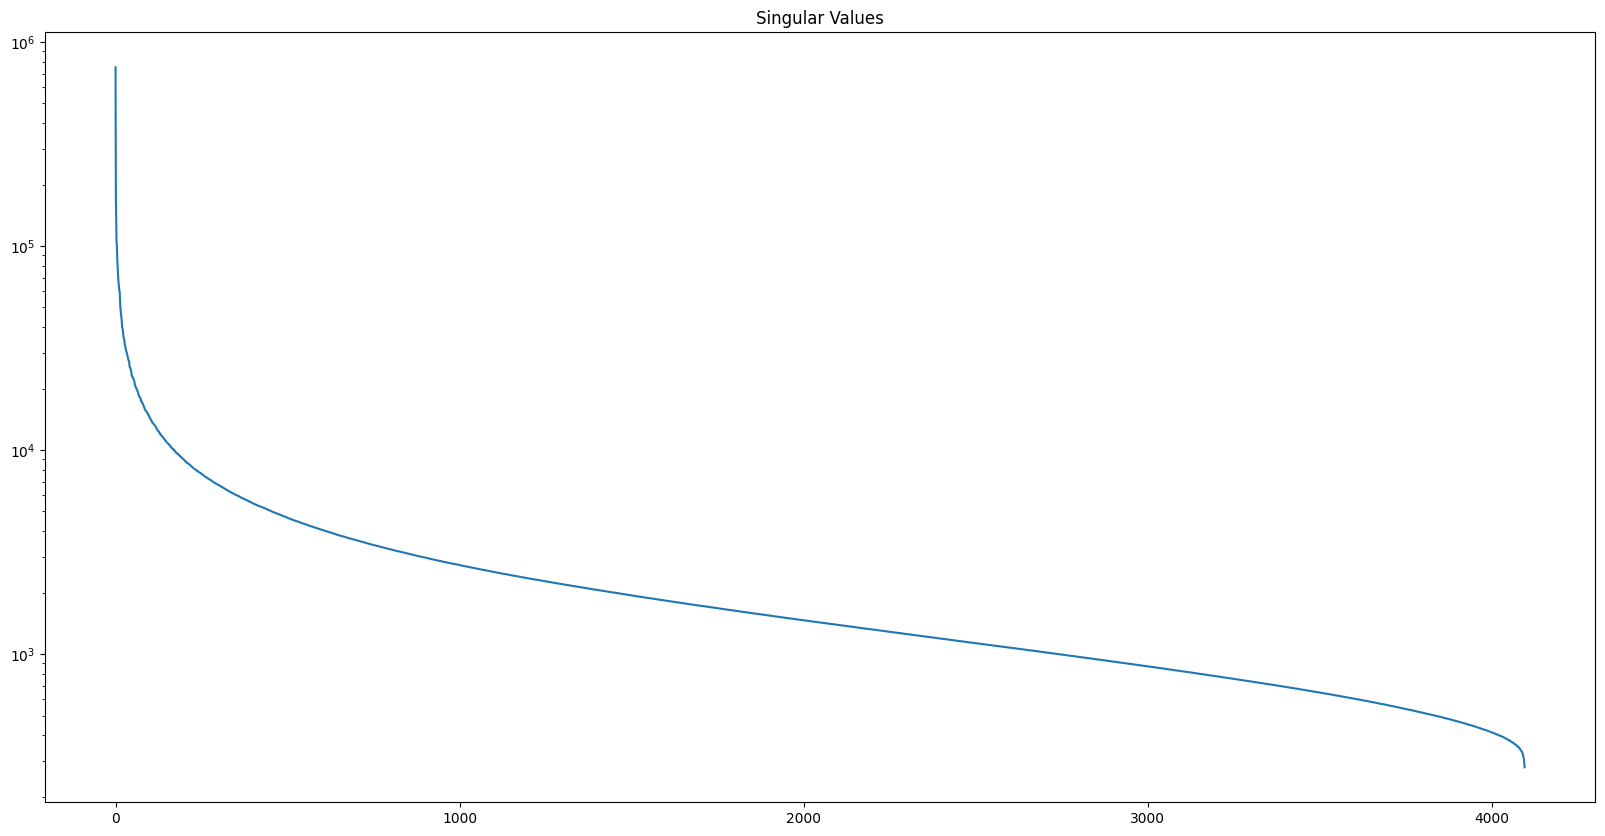

In [4]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.semilogy(S)
plt.title('Singular Values')
plt.show()

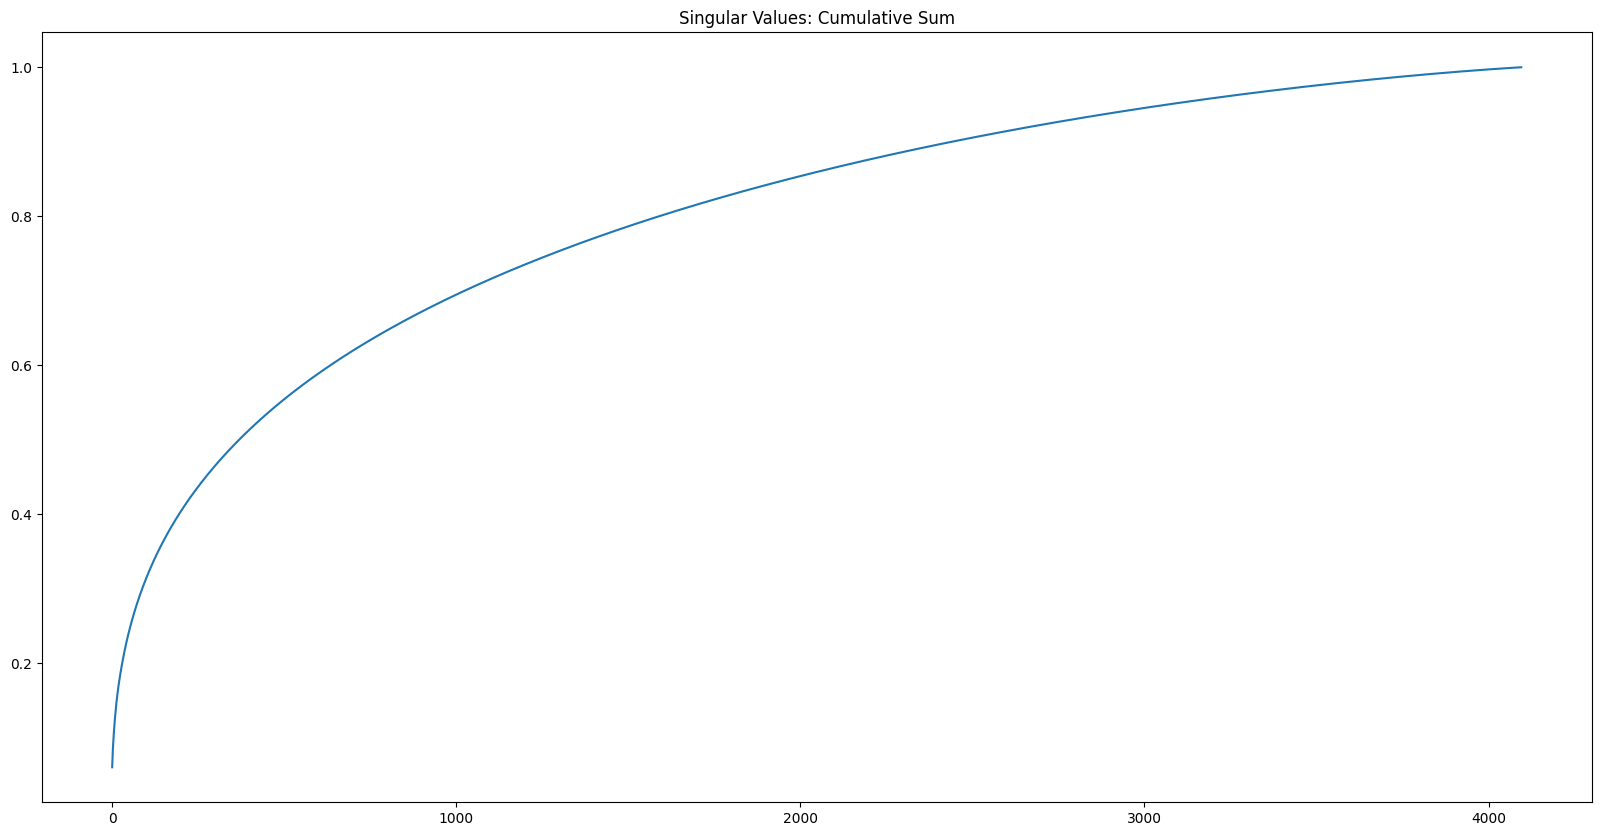

In [5]:
plt.figure(figsize=(20,10))
plt.plot(np.cumsum(S)/np.sum(S))
plt.title('Singular Values: Cumulative Sum')
plt.show() 

Optimal r (elbow point) = 68


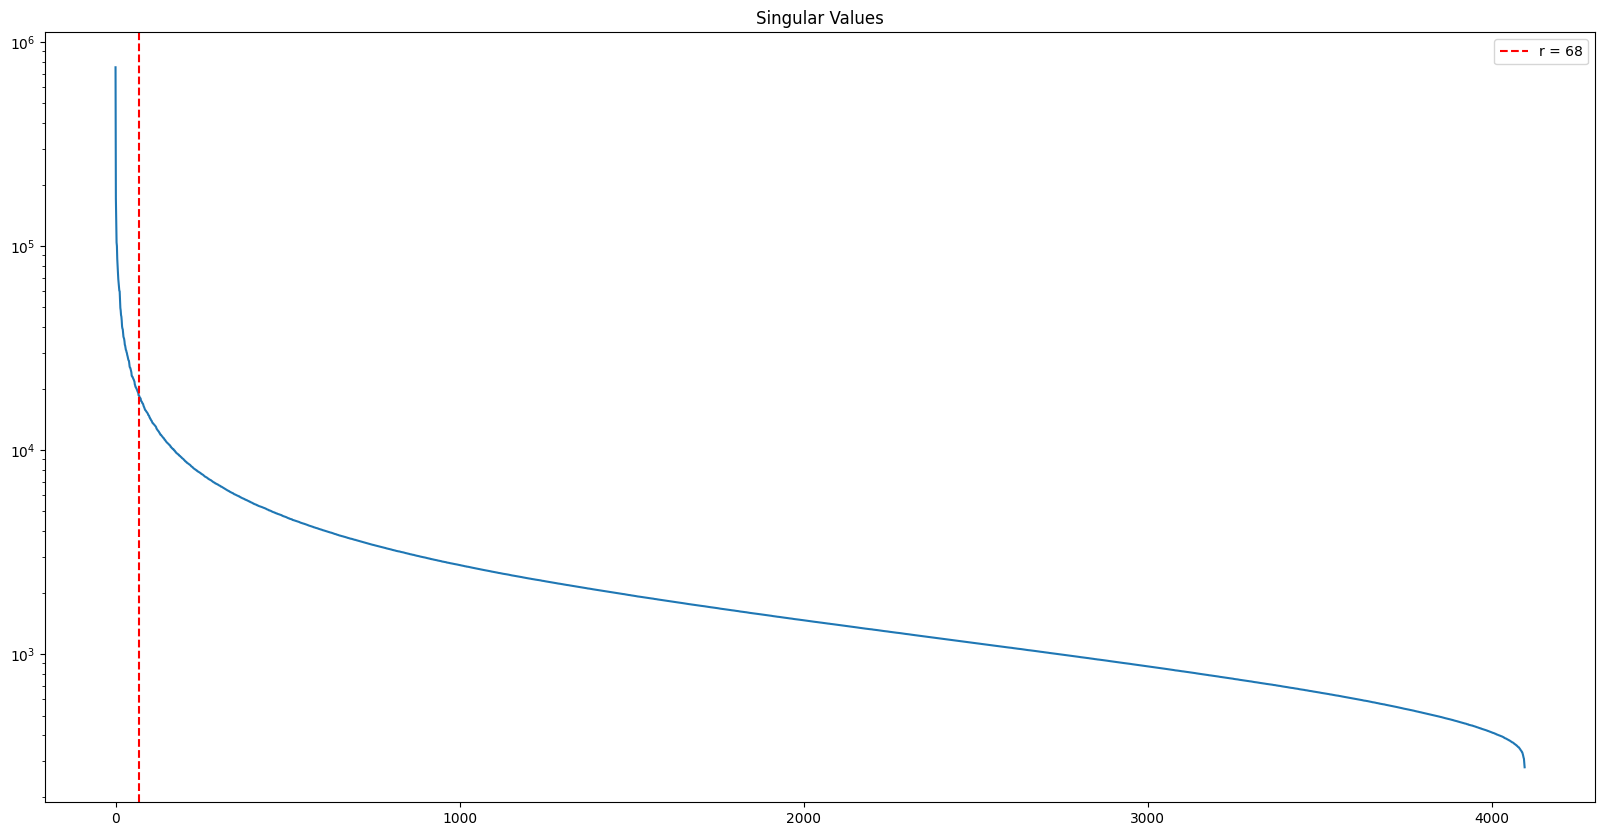

In [6]:
from kneed import KneeLocator
import numpy as np
import matplotlib.pyplot as plt

S = np.array(S)  

plt.figure(figsize=(20,10))
plt.semilogy(S)
plt.title("Singular Values")

x = np.arange(1, len(S)+1)
knee = KneeLocator(x, S, curve='convex', direction='decreasing')
r = knee.knee

print(f"Optimal r (elbow point) = {r}")
plt.axvline(x=r, color='r', linestyle='--', label=f'r = {r}')
plt.legend()
plt.show()


In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=r)    
pca.fit(flattened_unlabelled_data) 

PCA(n_components=np.int64(68))

In [9]:
X_labeled_pca = pca.transform(X_resized)

In [10]:
X_labeled_pca

array([[ -396.30351961,   949.05126811,  -111.10470145, ...,
          -87.41668042,   144.75562003,  -144.69052546],
       [ 2100.2590857 ,   474.72292936, -2320.16914501, ...,
           79.08707255,  -125.01802436,   -45.23063517],
       [  404.83362337,   654.55451284, -1387.41077264, ...,
          243.08024557,   226.4919968 ,  -197.17385115],
       ...,
       [ 2281.09301357,    52.3901259 , -1379.14776215, ...,
         -221.41378407,    61.1171564 ,   -11.84990156],
       [ 1186.40968057,  1943.65353483, -1380.65018787, ...,
          -68.19863788,    55.87459121,   135.06373319],
       [ 1912.90702008,  1185.72745327, -1888.17695122, ...,
           45.42022822,   -65.74229132,  -169.79034486]], shape=(920, 68))

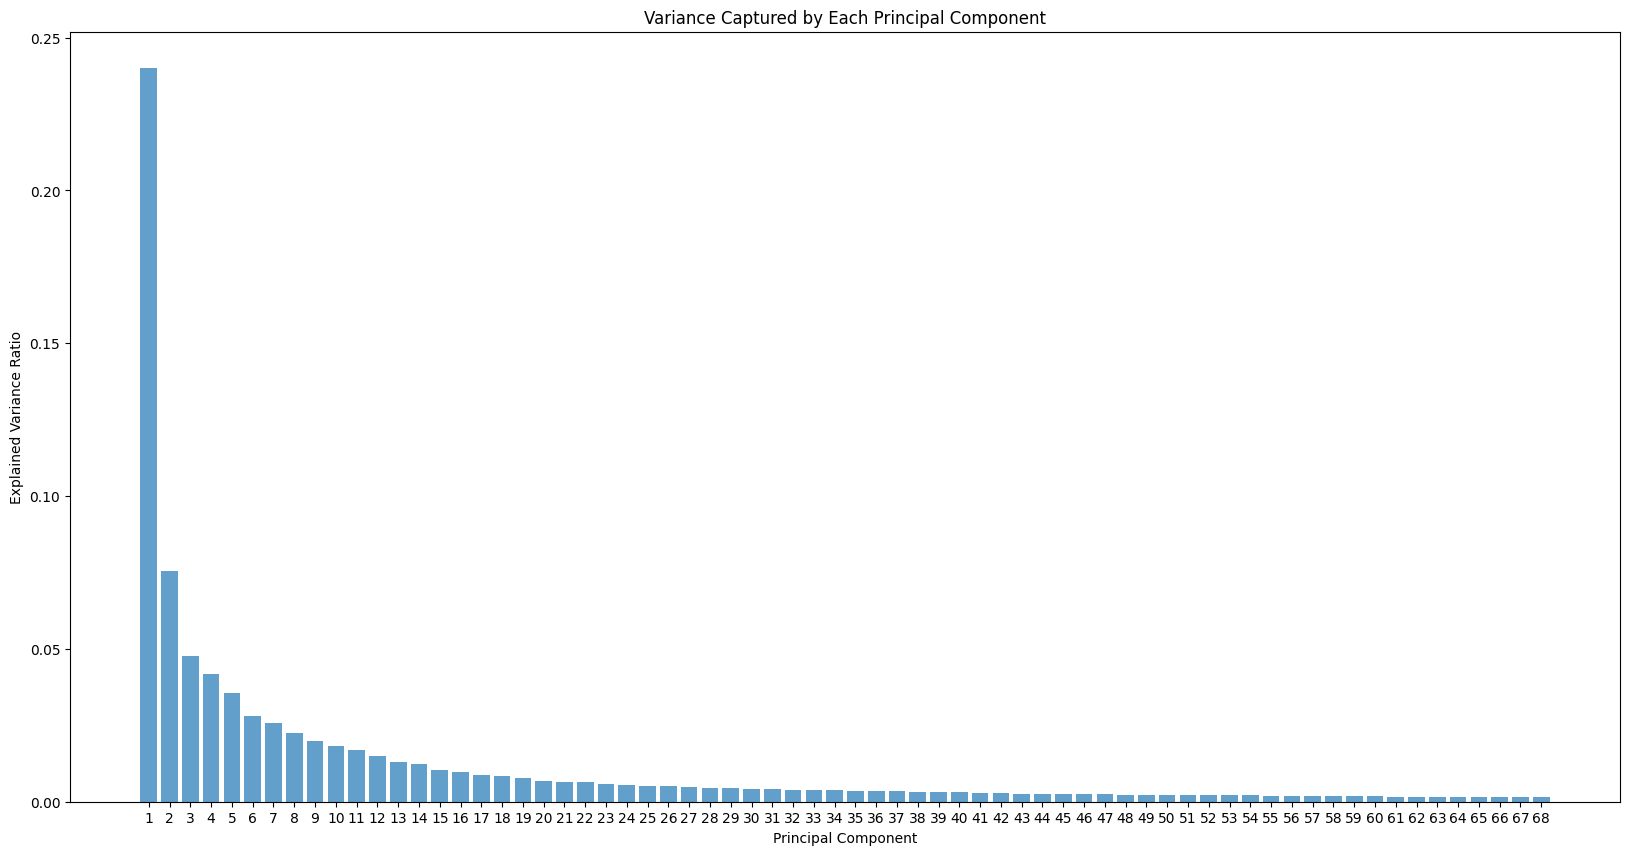

In [11]:
import matplotlib.pyplot as plt
import numpy as np

explained_variance = pca.explained_variance_ratio_  

plt.figure(figsize=(20, 10))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Captured by Each Principal Component')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()


In [12]:
np.save('X_labelled_pca.npy', X_labeled_pca)